# Market Data Analysis & Log Return Modeling 
## Aili LaMarca

The notebook pulls 10 years of historical price data for the HYG ETF (High-Yield Corporate Bond ETF) using the yfinance API, computes daily log returns, and visualizes long-term price trends.

In [65]:
import sys
sys.executable

'/opt/anaconda3/bin/python'

In [66]:
!pip install yfinance #download real market data

In [67]:
import sys
print(sys.executable)  # should show /opt/anaconda3/bin/python
!{sys.executable} -m pip install yfinance

/opt/anaconda3/bin/python


In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm

- import numpy as np for math and random numbers
- import pandas as pd for pricing and returns on data tables
- import matplotlib.pyplot as plt for plotting graphs
- from scipy.stats import norm to run normal distribution

In [69]:
plt.rcParams["figure.figsize"] = (10, 5)

In [70]:
ticker = "HYG" #chosen ETF to work with
data = yf.download(ticker, start="2015-01-01", auto_adjust=True)
#pulling real time data off yahoo finance, starting from 2015, providing 10yr data of daily prices
#auto_adjust=True means the prices are adjusted for dividends/splits
data = data[["Close"]].rename(columns={"Close": "Price"})
#keeping only closing data
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Price
Ticker,HYG
Date,
2015-01-02,50.502342
2015-01-05,50.034485
2015-01-06,49.842854
2015-01-07,50.152859
2015-01-08,50.530476


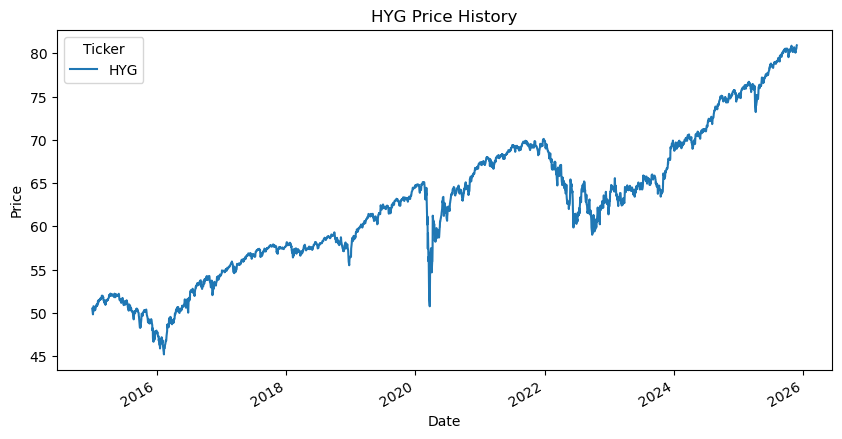

In [71]:
data["Price"].plot()
plt.title("HYG Price History")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [72]:
# Compute daily log returns: log(P_t / P_{t-1})
data["log_ret"] = np.log(data["Price"] / data["Price"].shift(1))

# Drop the first day (it has no previous price)
returns = data["log_ret"].dropna()

returns.head()

Date
2015-01-05   -0.009307
2015-01-06   -0.003837
2015-01-07    0.006200
2015-01-08    0.007501
2015-01-09    0.005007
Name: log_ret, dtype: float64

- data["Price"].shift(1) → shifts the price series down by 1, so each row lines up with yesterday’s price.
- np.log(data["Price"] / data["Price"].shift(1)) → computes the log return for each day
- .dropna() → removes the first entry, which doesn’t have a return (no previous price)
- returns.head() → shows the first few log returns so we can check it worked

The daily log return measures how much the ETF's price changes from one day to the next. 
It is computed as the natural logarithm of today's price divided by yesterday’s price:

Daily log return of an asset.

Measuring the percentage change in price from yesterday to today, but expressed using a natural logarithm instead of a simple percent change.

The daily log return is:
$$
r_t = \ln\left(\frac{P_t}{P_{t-1}}\right)
$$